In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA
import gzip

# load pickle module
import pickle
import networkx as nx
import pydot
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
WN = np.loadtxt('W_avg.csv')
pop = np.loadtxt('pop_new.csv')

In [31]:
Cave = np.loadtxt('Cave_th50.csv')
# C = np.loadtxt('C.csv')
theta=1
Temp = np.zeros((3142,3142))
# w=zeros(size(Cave));
for j in range(3142):
    pop_j = pop[j]
    w_from_j = Cave[:,j]/pop_j
    Temp[:,j] = w_from_j

In [32]:
for j in range(3142):
    b = 1 - sum(Temp[:,j]) + Temp[j,j]
    if b < 0.2:
        Temp[j,j] = 0.2
    else:
        Temp[j,j] = b

In [29]:
for j in range(3142):
    Temp[:,j] = Temp[:,j]/np.sum(Temp[:,j])

In [33]:
Temp

array([[0.83241153, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.94250428, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.94130276, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.97849303, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.97911595,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [357]:
WN[204,1858]

0.0005881970103873873

In [3]:
N = len(pop)

In [36]:
g_r = nx.from_numpy_array(WN)
g_r.remove_edges_from(nx.selfloop_edges(g_r))

In [35]:
nx.is_connected(g_r)

False

In [6]:
largest_component = max(nx.connected_components(g_r), key=len)

In [11]:
len(largest_component)

2546

In [13]:
1858 in list(largest_component)

True

In [38]:
subgraph = g_r.subgraph(largest_component)

In [39]:
nx.number_of_nodes(subgraph)

2546

In [40]:
nx.number_of_edges(subgraph)

7052

In [6]:
nx.is_weighted(G)

True

In [395]:
G = nx.from_numpy_array(WN.T, create_using=nx.DiGraph)
G.remove_edges_from(nx.selfloop_edges(G))



pop_sizes_reduced = (pop / pop.max()) * 2  # Reduced scale for node sizes
min_size = .1  # Minimum node size
node_sizes = {node: max(pop_sizes_reduced[i], min_size) for i, node in enumerate(G.nodes())}


bfs_tree = nx.bfs_tree(G, 1858)

In [411]:
edge_weights

{(1858, 204): 0.0005881970103873873,
 (1858, 223): 0.00011665702711232107,
 (1858, 228): 6.876624756094715e-05,
 (1858, 308): 0.009972947849397005,
 (1858, 309): 0.00023331405422464215,
 (1858, 312): 0.0008466844230941619,
 (1858, 319): 0.0002369979603439786,
 (1858, 446): 0.0001099031992268709,
 (1858, 610): 0.0002284021793988602,
 (1858, 1207): 0.000143058354300899,
 (1858, 1219): 7.490609109317458e-05,
 (1858, 1225): 0.00020936866444895517,
 (1858, 1229): 0.00010130741828175251,
 (1858, 1775): 0.021753465634681765,
 (1858, 1776): 0.0005660935736713686,
 (1858, 1780): 0.011644827243222534,
 (1858, 1782): 0.027140564349858107,
 (1858, 1784): 0.0020586895363558554,
 (1858, 1785): 0.009857518790991131,
 (1858, 1786): 0.007055294202882534,
 (1858, 1787): 0.004297890472559197,
 (1858, 1788): 0.001180077926894111,
 (1858, 1789): 0.003225259807479066,
 (1858, 1791): 0.0025848741270677457,
 (1858, 1793): 0.006285971808294437,
 (1858, 1830): 0.06790175759160953,
 (1858, 1840): 0.0001006934339

In [413]:
edge_weights.get((1858, 204))

0.0005881970103873873

In [ ]:
#     elif (num_nodes >= 10) & (num_nodes < 50):  # Example threshold, adjust as needed
#         radius += 20 * math.log(num_nodes)
#     elif (num_nodes >= 50):  # Example threshold, adjust as needed
#         radius += 50 * math.log(num_nodes)

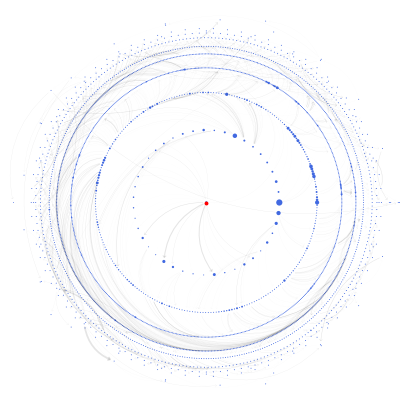

In [450]:
import networkx as nx
import matplotlib.pyplot as plt
import math

## Creating a graph from the adjacency matrix
G = nx.from_numpy_array(WN.T, create_using=nx.DiGraph)
G.remove_edges_from(nx.selfloop_edges(G))



pop_sizes_reduced = (pop / pop.max()) * 20  # Reduced scale for node sizes
min_size = .5  # Minimum node size
node_sizes = {node: max(pop_sizes_reduced[i], min_size) for i, node in enumerate(G.nodes())}


bfs_tree = nx.bfs_tree(G, 1858)


# Calculate levels
levels = {}
def assign_levels(node, level=0):
    if node not in levels:
        levels[node] = level
        for neighbor in bfs_tree.neighbors(node):
            assign_levels(neighbor, level + 1)
assign_levels(1858)

# Group nodes by level
nodes_by_level = {}
for node, level in levels.items():
    if level not in nodes_by_level:
        nodes_by_level[level] = []
    nodes_by_level[level].append(node)

# Manually add edge weights to bfs_tree
for (u, v, data) in G.edges(data=True):
    if bfs_tree.has_edge(u, v):
        bfs_tree[u][v]['weight'] = data.get('weight', 1.0)  # Default weight is 1.0

# Extract edge weights and scale for plotting
edge_weights = nx.get_edge_attributes(bfs_tree, 'weight')
# scaled_edge_weights = [edge_weights.get(e, 1.0) * 0.1  for e in bfs_tree.edges()]  # Scale factor


# Dynamic radius calculation based on node count
base_radius = 20  # Base radius for the first level
radius_increment = 30  # Additional radius per level

max_radius = 0
for level, nodes in nodes_by_level.items():
    num_nodes = len(nodes)
    radius = base_radius + level * radius_increment
    if (num_nodes > 1):  # Example threshold, adjust as needed
        radius += 30 * math.log(num_nodes)

    
    if radius > max_radius:
        max_radius = radius

    for i, node in enumerate(nodes):
        angle = 2 * math.pi * i / num_nodes
        pos[node] = (radius * math.cos(angle), radius * math.sin(angle))

# Create plot
pos[1858] = (0,0)
fig, ax = plt.subplots(figsize=(5, 5))  #figsize=(5, 5) , dpi=350 Adjust figure size and DPI
ax.set_frame_on(False)

# Draw nodes and edges
nx.draw_networkx_nodes(bfs_tree, pos, node_color='royalblue', node_size=[node_sizes.get(node, 100) for node in bfs_tree.nodes()],edgecolors='none')
nx.draw_networkx_nodes(bfs_tree, pos, nodelist=[1858], node_color='red', node_size=[node_sizes.get(1858, 100)])

# Draw edges with varying widths based on scaled_edge_weights
for (u, v) in bfs_tree.edges():
    edge_weight = edge_weights.get((u, v), 1.0)*6  # Default to 1.0 if not found
    ax.annotate("",
                xy=pos[v], xycoords='data',
                xytext=pos[u], textcoords='data',
                arrowprops=dict(arrowstyle="->,head_length=0.1,head_width=0.1",alpha=0.1,
                                linewidth= edge_weight,  # Set linewidth based on edge weight
                                shrinkA=2.5, shrinkB=2.5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=0.3")
                )

# nx.draw_networkx_edges(bfs_tree, pos, width=scaled_edge_weights, edge_color='grey', arrows=True, arrowsize=1.5, alpha=0.5)
ax.set_xlim([-max_radius-1.5, max_radius+1.5])
ax.set_ylim([-max_radius-1.5, max_radius+1.5])
# plt.show()
plt.savefig(save_dir+"SDE_0.025/map_{}.png".format(0), bbox_inches='tight', pad_inches=0.01, dpi=350)

In [174]:
file_dir = '/Users/qingyao/Documents/branching_data/simulation/meta_stoch/dt0.1/'
sub_export_dir = file_dir+'meta_stoch_nbio_{}_v1/'.format(3)
export_names = sub_export_dir+'New_Inf_nbi_{}_{}.csv'.format(0.025,(1+1))
temp = np.loadtxt(export_names,delimiter=',')

In [175]:
file_dir = '/Users/qingyao/Documents/branching_data/simulation/meta_stoch/dt0.1/'
sub_export_dir = file_dir+'meta_stoch_nbio_{}_v1/'.format(0)
export_names = sub_export_dir+'New_Inf_nbi_{}_{}.csv'.format(20.0,(1+1))
temp3 = np.loadtxt(export_names,delimiter=',')

In [137]:
import numpy as np
import gzip

def load_gzipped_numpy(filename):
    try:
        with gzip.open(filename, 'rb') as f:
            return np.load(f, allow_pickle=True)
    except FileNotFoundError:
        return [0]

In [142]:
R0 = 2.5
# rs = np.array([2.0, 0.025])
# rs = np.array([0.1])
export_dir = '/Users/qingyao/Documents/branching_data/simulation/python_cutoff_addno/'
sub_export_dir = export_dir+'branching_R0-{}_r-{}/'.format(np.round(R0,2),np.round(0.025,3))
   
export_names = sub_export_dir+'NewInf_R0-{}_r-{}_{}.npy.gz'.format(np.round(R0,2),np.round(0.025,3),(2+1))
temp2 = load_gzipped_numpy(export_names)

In [164]:
np.sum(temp2!=0)

2507

In [459]:
# Perform the operation using broadcasting. This will automatically expand the dimensions where needed.
infec_perpop_nbio = (temp3 / pop[:,None]) * 100000
temp_invade = np.zeros_like(temp3)
temp_invade[infec_perpop_nbio > 10] = 1
temp_invade[1858,:] = 1
orange_nodes_ts = []
red_nodes_ts = []
for t in range(60):
    infected = list(np.where(infec_perpop_nbio[:,t] >10)[0])
    red_nodes_ts.append(infected)
#     if len(infected)==0:
#         print(t)
#         red_nodes_ts.append([1858])
#     else:
    temp_invade[infected,t:] = 1
    orange_nodes_ts.append(list(np.where(temp_invade[:,t] == 1)[0]))

In [460]:
for t in range(60):
    
    red_nodes = red_nodes_ts[t]
    orange_nodes = orange_nodes_ts[t]
    
    fig, ax = plt.subplots(figsize=(5, 5)) 
    ax.set_frame_on(False)
     
    nx.draw_networkx_nodes(bfs_tree, pos, node_color='royalblue', node_size=[node_sizes.get(node, 100) for node in bfs_tree.nodes()],edgecolors='none')
    if len(orange_nodes) >0 :
        nx.draw_networkx_nodes(bfs_tree, pos, nodelist=orange_nodes, node_color='goldenrod', node_size=[node_sizes.get(i, 100) for i in orange_nodes],edgecolors='none')
        nx.draw_networkx_nodes(bfs_tree, pos, nodelist=red_nodes, node_color='crimson', node_size=[node_sizes.get(i, 100) for i in red_nodes],edgecolors='none')
    else:
        nx.draw_networkx_nodes(bfs_tree, pos, nodelist=[1858], node_color='red', node_size=[node_sizes.get(1858, 100)])
    # Draw edges
    # Draw edges with varying widths based on scaled_edge_weights
    # Draw edges with varying widths based on scaled_edge_weights
    # Draw edges with varying widths based on scaled_edge_weights
    for (u, v) in bfs_tree.edges():
        edge_weight = edge_weights.get((u, v), 1.0)*6  # Default to 1.0 if not found
        ax.annotate("",
                    xy=pos[v], xycoords='data',
                    xytext=pos[u], textcoords='data',
                    arrowprops=dict(arrowstyle="->,head_length=0.1,head_width=0.1",alpha=0.1,
                                    linewidth= edge_weight,  # Set linewidth based on edge weight
                                    shrinkA=2.5, shrinkB=2.5,
                                    patchA=None, patchB=None,
                                    connectionstyle="arc3,rad=0.3")
                    )

    # nx.draw_networkx_edges(bfs_tree, pos, width=scaled_edge_weights, edge_color='grey', arrows=True, arrowsize=1.5, alpha=0.5)
    ax.set_xlim([-max_radius-1.5, max_radius+1.5])
    ax.set_ylim([-max_radius-1.5, max_radius+1.5])
    

    save_dir = '/Users/qingyao/Documents/branching_data/simulation/plots/'
    
    fig.savefig(save_dir+"Poisson/map_{}.png".format(t), bbox_inches='tight', pad_inches=0.01, dpi=350)
    plt.close(fig)

In [456]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
import os
from PIL import Image

mpl.rcParams['animation.convert_path'] = 'magick'

# Folder containing PNG images
folder_path = '/Users/qingyao/Documents/branching_data/simulation/plots/SDE_0.025/'  # Replace with your folder path

# Sort the file names
file_names = sorted((fn for fn in os.listdir(folder_path) if fn.endswith('.png')))

# Read images using PIL
images = [Image.open(os.path.join(folder_path, fn)) for fn in file_names]

# Create a figure and axes
fig, ax = plt.subplots()
ax.axis('off')
# Initialize the plot with the first image
img_plot = ax.imshow(images[0])

# Update function for animation
def update(frame):
    img_plot.set_data(images[frame])
    # Update the title for each frame
    ax.set_title(f"SDE, r = 0.025 {frame + 1}")
    ax.set_frame_on(False)
    return [img_plot]

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(images), blit=True)

# Save as GIF
gif_path = 'output.gif'  # Replace with your desired output file path
ani.save(gif_path, writer='imagemagick', fps=1, dpi=350)  # Adjust fps as needed

plt.close(fig)


MovieWriter imagemagick unavailable; using Pillow instead.


In [472]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
from PIL import Image

# def load_images(folder_path):
#     file_names = sorted((fn for fn in os.listdir(folder_path) if fn.endswith('.png')))
#     return [Image.open(os.path.join(folder_path, fn)) for fn in file_names]

def load_images(folder_path):
    ims = []
    for t in range(60):
        file_name = folder_path + "map_{}.png".format(t)
        ims.append(Image.open(file_name))
    return ims

# Paths to the folders
folder_path1 = '/Users/qingyao/Documents/branching_data/simulation/plots/SDE_0.025/'  # Replace with your first folder path
folder_path2 = '/Users/qingyao/Documents/branching_data/simulation/plots/Branching_0.025/'  # Replace with your second folder path
folder_path3 = '/Users/qingyao/Documents/branching_data/simulation/plots/Poisson/'  # Replace with your second folder path

# Load images from both folders
images1 = load_images(folder_path1)
images2 = load_images(folder_path2)
images3 = load_images(folder_path2)

# Ensure both have the same number of frames
frame_count = min(len(images1), len(images2))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Optional: Adjust the layout to minimize outer space
# plt.subplots_adjust(left=0.02, right=0.6, top=0.6, bottom=0.05, wspace=0.02, hspace=0.02)
plt.subplots_adjust(left=0.02, right=0.98, top=0.95, bottom=0.05, wspace=0.02, hspace=0.02)



# Make the axes invisible
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')


# Initialize the subplots with the first images
img_plot1 = ax1.imshow(images1[0])
img_plot2 = ax2.imshow(images2[0])
img_plot3 = ax3.imshow(images3[0])

# Update function for animation
def update(frame):
    img_plot1.set_data(images1[frame])
    img_plot2.set_data(images2[frame])
    img_plot3.set_data(images3[frame])
    
    ax1.set_title(f"SDE, r = 0.025, {frame + 1}",size=8)
    ax2.set_title(f"Branching, r = 0.025, {frame + 1}",size=8)
    ax3.set_title(f"Poisson, r -> inf, {frame + 1}",size=8)
    return [img_plot1, img_plot2, img_plot3]

# Create animation
ani = animation.FuncAnimation(fig, update, frames=frame_count, blit=True)

# Save as a GIF
gif_path = 'combined_output.gif'  # Replace with your desired output file path bbox_inches='tight', pad_inches=0.01
ani.save(gif_path, writer='imagemagick', fps=1,dpi=350)  # Adjust fps as needed

plt.close(fig)

In [462]:
frame_count

60